In [1]:
import collections

import matplotlib.pyplot as plt

from pathlib import Path

import torch
import torchvision
from torchvision.datasets import StanfordCars
from torchvision import transforms
torch.__version__

'1.13.1+cu117'

# 0 - This is a image exploration notebook

It assumes that the dataset was already downloaded at the DATA_FOLDER_PATH

In [2]:
DATA_FOLDER_PATH = Path("../../data/raw")
    
train_dataset = StanfordCars(root=DATA_FOLDER_PATH,
                             split='train',
                             transform=transforms.ToTensor(),
                             target_transform=None,
                             download=False
                             )

test_dataset = StanfordCars(root=DATA_FOLDER_PATH,
                             split='test',
                             transform=transforms.ToTensor(),
                             target_transform=None,
                             download=False
                             )

# 1 - Basic Informations

In [3]:
len(train_dataset.classes), len(test_dataset.classes)

(196, 196)

In [4]:
len(train_dataset), len(test_dataset)

(8144, 8041)

# 2 - Inspecting the classes for the training and test data

In [28]:
class_names_dict = {value: key for key, value in train_dataset.class_to_idx.items()}
for class_name, class_idx in list(class_names_dict.items())[:10]:
    print(f"{class_name}: {class_idx}")

0: AM General Hummer SUV 2000
1: Acura RL Sedan 2012
2: Acura TL Sedan 2012
3: Acura TL Type-S 2008
4: Acura TSX Sedan 2012
5: Acura Integra Type R 2001
6: Acura ZDX Hatchback 2012
7: Aston Martin V8 Vantage Convertible 2012
8: Aston Martin V8 Vantage Coupe 2012
9: Aston Martin Virage Convertible 2012


In [29]:
train_imgs_classes = [class_idx for _, class_idx in train_dataset._samples]
test_imgs_classes = [class_idx for _, class_idx in test_dataset._samples]

In [30]:
def get_num_items_per_class(targets:list) -> dict:
    c = collections.Counter(targets)
    return dict(c)

In [31]:
train_imgs_per_class = get_num_items_per_class(train_imgs_classes)
test_imgs_per_class = get_num_items_per_class(test_imgs_classes)

(20.0, 70.0)

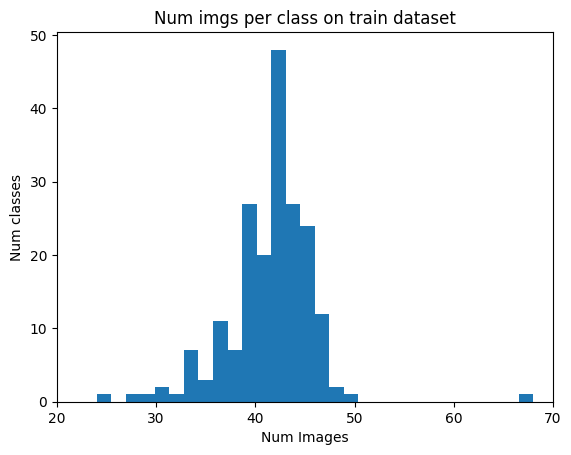

In [32]:
plt.hist(train_imgs_per_class.values(), bins=30)
plt.xlabel("Num Images")
plt.ylabel("Num classes")
plt.title("Num imgs per class on train dataset")
plt.xlim(20, 70)

(20.0, 70.0)

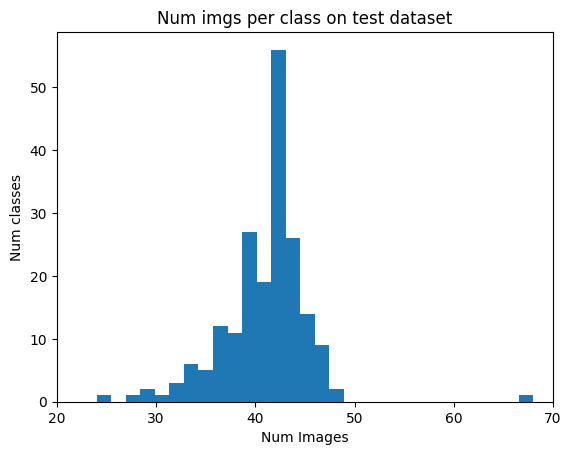

In [33]:
plt.hist(test_imgs_per_class.values(), bins=30)
plt.xlabel("Num Images")
plt.ylabel("Num classes")
plt.title("Num imgs per class on test dataset")
plt.xlim(20, 70)

Majority of classes seems to have between 35 and 45 images for training and testing. Some classes have very low quantity of images between 25 and 30. For the training, it will probably be necessary some data augmentation.

# 3 - Plotting random images

In [34]:
import random

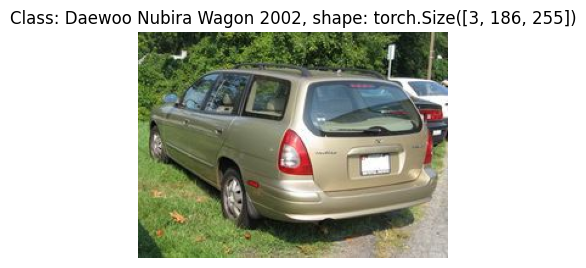

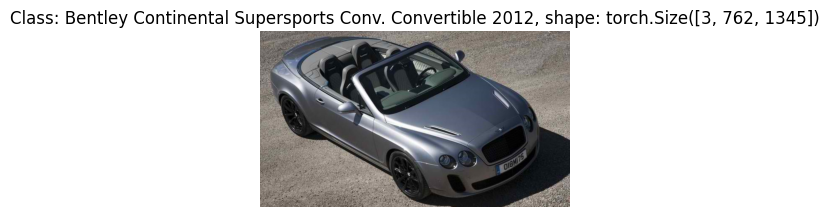

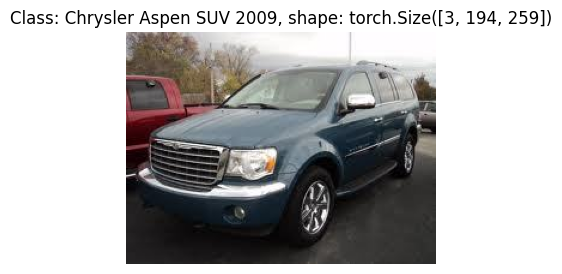

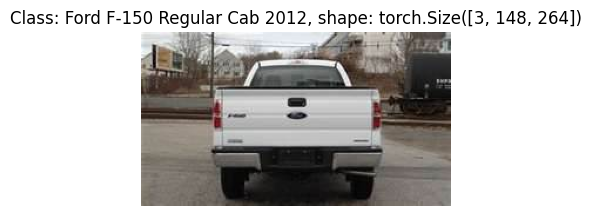

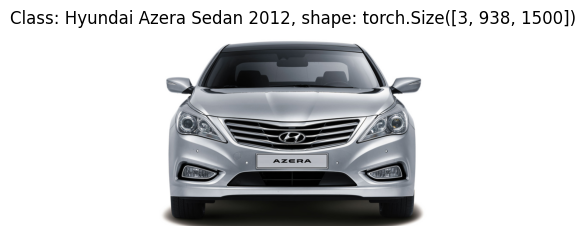

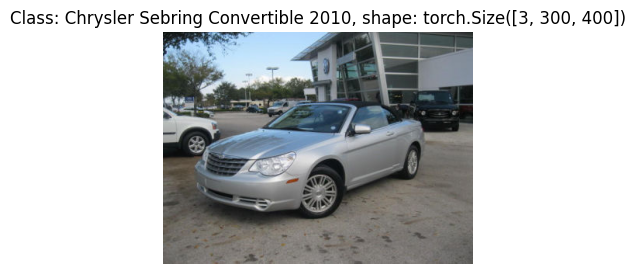

In [42]:
# random.seed(42)

NUM_IMGS = 6

for rd_img_ids in range(NUM_IMGS):
    random_instance = random.choice(train_dataset)
    img_tensor = random_instance[0]
    img_class = class_names_dict[random_instance[1]]
    transformed_img = img_tensor.permute(1, 2, 0)
    
    plt.figure(figsize=(4,4))
    plt.axis(False)
    plt.imshow(transformed_img)
    plt.title(f"Class: {img_class}, shape: {img_tensor.shape}")

We can see that images have different shapes. Some ideas for data augmentation could be:
- Horizontal Flip
- Rotation
- Color, saturation, brightness changes
- Perspective changes
- Blurs